# CLP Graphic solution example

## Try me
 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/CLP/tutorials/graphic-solution-extended.ipynb)[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FCLP%2Ftutorials%2Fgraphic-solution-extended.ipynb)

## Introduction
In this notebook we analyse the graphic method to solve CLP problems of two variables. First, we will derive a CLP model of our problem, and then, we will use the Python plotting library matplotlib to obtain a graphical representation that we will use to find the optimal solution.

The graphic method is not really a practical method to solve CLP problems, but rather, a quite didactic mean to gain understanding on the CLP. Later in the course, we will cover the Simplex algorithm, one of the most successful algorithms in history, which is an extension of this method. To put it into practice, we will use a simple blending problem defined below.  


### Problem Definition
The cost per gram of $M_{1}$ is 45 €cents

The cost per gram $M_{2}$ is 12 €cents

The final product has two nutritional properties that depend on $M_{1}$ and $M_{2}$, the non-saturated fat and the proteins.

To meet the quality requirements, the final product must have no more than 0.5 percent of non saturated fat and at least 8 percent proteins.

The recip must have at least 2% of $M_{2}$. 

$M_{1}$ is 3 percent non saturaded fat and 80 percent protein.

$M_{2}$ is 3 percent non saturated fat and 20 percent protein.


**> How many grams of M1 and M2 should be used in every 100 grams of product?**

### Model
The problem can be modeled as:

$\min Z = 45x_{1} + 12x_{2}$

where:

$x_{1}:$ grams of M1 per 100 grams of product

$x_{2}:$ grams of M2 per 100 grams of product

The objective function is subject to the following constraints:

$x_{1} > 0$

$x_{2} \geq 2$

$x_{1}+x_{2} \leq 100$

$3x_{1}+3x_{2} \leq 50$

$8x_{1} + 2x_{2} \geq 80$

### Solution 
We will use the [numpy](https://docs.scipy.org/doc/numpy/reference/index.html) library to create the decision space and the [pyplot](https://matplotlib.org/api/pyplot_api.html) library to represent the decision space. 
Numpy provides useful functions to create multidimensional arrays. Below, some tips of the functions we are going to use.

### Numpy Functions
#### Linspace
We will use the function linspace to create the x axis that represents the $x_{1}$ decision variable. Linspace receives as arguments the minimum and maximum values of the axis and the number of elements that we want in our axis.

#### maximum and minimum
We will use the functions maximum and minimum to obtain the lines that delimit the feasibility region. 
Minimum and maximum take two (multidimensional) arrays and provide an array with the element-wise minimum or maximum at each position.

### Pyplot Functions
#### plot
We will use the function plot to draw lines. Plot takes two arrays as parameters and uses the values of each position of the array as coordinates. We can add additional parameters as described [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html). We will use one parameter to represent the labels.

#### fill_between
We will use the function fill_between to fill the area between two lines. Since we can only use two lines to call fill, we will need to use the numpy functions maximum and minimum to create the lines that we want to draw

#### xlim, ylim
We will use these functions to set the limits of both coordinates

#### ylabel, xlabel, legend
We will use these functions to add labels to the different axis and a legend to the figure



### Feasibility region
Let us determine the feasibility region by iteratively representing the different constraints in the decision space. We start by representing the possible values of $x_{1}$ and $x_{2}$ just taking into account the physical constraints:

$x_{1} > 0$

$x_{2} > 0$

$x_{1}+x_{2} \leq 100$


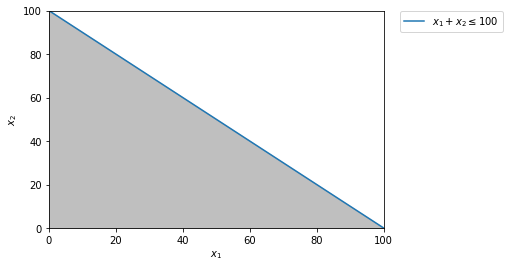

In [1]:
#Import the numpy and pyplot libraries, we set the aliases np and plt so that it is easier to use
import numpy as np
import matplotlib.pyplot as plt

#We set the mode inline of matplotlib to get the result at the output of the cell code
%matplotlib inline

# Construct lines, in our coordinate system x represents our decision variable x1 and y represents our decision variable x2
# x > 0, we use the function linspace to create a linear space for x
x = np.linspace(0, 100, 2000) #2000 numbers from 0 to 100
# y1 represents the line of constraint y <= 100 - x
y1 = 100 - x

#y2 represents the line of constraint y > 0 (we need this function to call fill between)
y2 = x*0

#1. Make plot
plt.plot(x, y1, label=r'$x_{1}+x_{2} \leq 100$')


#2. Adjust axis
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')

#3. Fill feasible region

plt.fill_between(x, y1, y2, where=y1>y2, color='grey', alpha=0.5) #fill where y1 is greater than y2

#4. plot legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Introducing constraints
No we enter the first contraint:

$x_{1} > 0$

$x_{2} \geq 2$

$x_{1}+x_{2} \leq 100$

We can see how this affects the feasibility area by representing again the equations

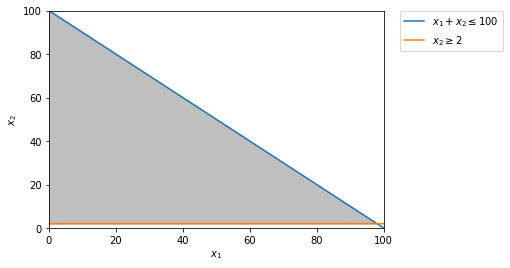

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines, x represents our decision variable x1 and y represents our decision variable x2
# x > 0
x = np.linspace(0, 100, 2000) #2000 numbers from 0 to 100
# y2 represents the line of constraint y <= 100 - x
y1 = 100 - x
y2 = x*0+2;

#1. Make plot
plt.plot(x, y1, label=r'$x_{1}+x_{2} \leq 100$')
plt.plot(x, y2, label=r'$x_{2}\geq2$')

#2. Adjust axis
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')

#3. Fill feasible region

plt.fill_between(x, y1, y2, where=y1>y2, color='grey', alpha=0.5) #fill where y1 is greater than y2

#4. plot legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now we enter the next contraint:

$x_{1} > 0$

$x_{2} \geq 2$

$x_{1}+x_{2} \leq 100$

$3x_{1}+3x_{2} \leq 50$

Again, we can check the effec on the feasibility region

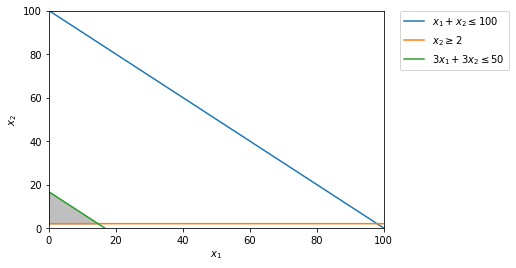

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines, x represents our decision variable x1 and y represents our decision variable x2
# x > 0
x = np.linspace(0, 100, 2000) #2000 numbers from 0 to 100
# y2 represents the line of constraint y <= 100 - x
y1 = 100 - x
y2 = x*0+2;
y3 = (50-3*x)/3.0

#1. Make plot
plt.plot(x, y1, label=r'$x_{1}+x_{2} \leq 100$')
plt.plot(x, y2, label=r'$x_{2}\geq2$')
plt.plot(x, y3, label=r'$3x_{1} + 3x_{2} \leq 50$')

#2. Adjust axis
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')

#3. Fill feasible region

plt.fill_between(x, y3, y2, where=y3>y2, color='grey', alpha=0.5) #fill where y3 is greater than y2

#4. plot legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We can see that now the physical constraint $x_{1}+x_{2} \leq 100$ does not have any impact on the feasibility region. We can focus on narrower intervals of $x_{1}$ and $x_{2}$ to search for the best solution. Let's also introduce the next constraint.

$x_{1} > 0$

$x_{2} \geq 2$

$x_{1}+x_{2} \leq 100$

$3x_{1}+3x_{2} \leq 50$

$8x_{1} + 2x_{2} \geq 80$

Now the feasibility region is:

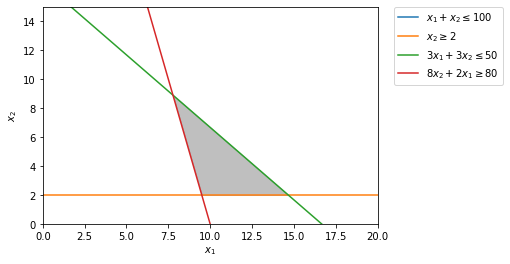

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines, x represents our decision variable x1 and y represents our decision variable x2
# x > 0
x = np.linspace(0, 100, 2000) #2000 numbers from 0 to 100

# y1 represents the physical constraint x + y <= 100
y1 = 100 - x

# y2 represents the line of constraint y >= 2
y2 = x*0+2

# y3 represents the constraint 3x + 3y <= 50
y3 = (50-3*x)/3.0

# y4 represents the line of the constraint 6x + 2y >= 4 
y4 = (80 - 8*x)/2.0


#1. Make plot
plt.plot(x, y1, label=r'$x_{1}+x_{2} \leq 100$') #y4
plt.plot(x, y2, label=r'$x_{2}\geq2$') #y1
plt.plot(x, y3, label=r'$3x_{1} + 3x_{2} \leq 50$') #y2
plt.plot(x, y4, label=r'$8x_{2} + 2x_{1} \geq 80$') #y3 

#2. Adjust axis
plt.xlim((0, 20))
plt.ylim((0, 15))
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')

#3. Fill feasible region
y5=np.maximum(y4, y3)  #line representing the maximum between y4 and y3
y6=np.maximum(y2,y4)   #line representing the maximum between y2 and y4
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5) #fill where y5 ys greater than y6

#4. plot legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The feasible region (in grey) contains all possible solutions to the objective function. 

Minima and maxima of linear programming problems are found at the vertices of the feasible region. Therefore, the solution is the minimum of the objective function between the three vertices.

The three corners are the intersections between the lines:

| Line 1        | Line 2        | 
| ------------- |:-------------:| 
| 3x +3y ≤ 50   | 8x +2y ≥ 80   | 
| 8x +2y ≥ 80   | y ≥ 2         | 
| y ≥ 2         | 3x +3y ≤ 50   |

Considering that the objective function is:

Z = 45x + 12y

We can calculate Z for each corner:

1)

  3x +3y ≤ 50 and 8x +2y ≥ 80  
  (50-3x)/3 = (80 - 8x) / 2  
  x = 7.78  
  y = 8.86  
  Z = 456.42  


2)

  8x +2y ≥ 80 and y ≥ 2  
  (80 - 8x) / 2 = 2  
  x = 9.5  
  y = 2  
  Z = 451.5  


3)

  y ≥ 2 - x and 3x +3y ≤ 50  
  2 = (50 - 3x) / 3  
  x = 14.67  
  y = 2  
  Z = 684  

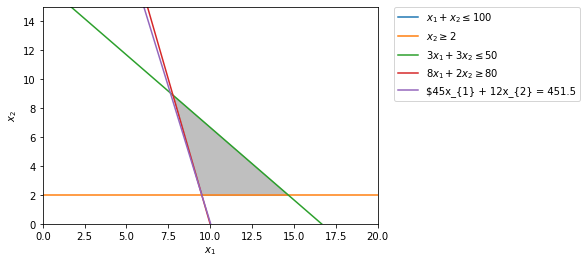

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines, x represents our decision variable x1 and y represents our decision variable x2
# x > 0
x = np.linspace(0, 100, 2000) #2000 numbers from 0 to 100

# y1 represents the physical constraint x + y <= 100
y1 = 100 - x

# y2 represents the line of constraint y >= 2
y2 = x*0+2

# y3 represents the constraint 3x + 3y <= 50
y3 = (50-3*x)/3.0

# y4 represents the line of the constraint 6x + 2y >= 4 
y4 = (80 - 8*x)/2.0

y6 = (451.5 - 45*x)/12

#1. Make plot
plt.plot(x, y1, label=r'$x_{1}+x_{2} \leq 100$') #y4
plt.plot(x, y2, label=r'$x_{2}\geq2$') #y1
plt.plot(x, y3, label=r'$3x_{1} + 3x_{2} \leq 50$') #y2
plt.plot(x, y4, label=r'$8x_{1} + 2x_{2} \geq 80$') #y3 
plt.plot(x, y6, label=r'$45x_{1} + 12x_{2} = 451.5')

#2. Adjust axis
plt.xlim((0, 20))
plt.ylim((0, 15))
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')

#3. Fill feasible region
y5=np.maximum(y4, y3)  #line representing the maximum between y4 and y3
y6=np.maximum(y2,y4)   #line representing the maximum between y2 and y4
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5) #fill where y5 ys greater than y6

#4. plot legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

 We have successfully calculated that the minimum value for Z (451.5), when $x_{1}$ is 9.5 and $x_{2}$ is 2.

This method of testing every vertex is only feasible for a small number of variables and constraints. As the numbers of constraints and variables increase, it becomes far more difficult to graph these problems and work out all the vertices. For example, if there were a third variable:

Z = Ax + By + Cz

We would have to graph in three dimensions (x, y and z).

In the next few notebooks, we'll take a look at how we can use the graphical method to solve other CLP problems: 

- [Making Chappie solved with the graphical method](../solved/Making%20Chappie%20(Solved%20Graphic).ipynb)
- [Making weapons solved with the graphical method](../solved/Making%20weapons%20(solved%20Graphic).ipynb)